<h1>MANUFACTURING QUALITY PREDICTION USING POLYNOMIAL REGRESSION</h1>

DATASET - https://www.kaggle.com/datasets/rukenmissonnier/manufacturing-data-for-polynomial-regression


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('manufacturing_quality_data.csv')
dataset

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [4]:
dataset.rename(columns={'Temperature x Pressure': 'Temperature_x_Pressure'}, inplace=True)
dataset.rename(columns={'Material Fusion Metric': 'Material_Fusion_Metric'}, inplace=True)
dataset.rename(columns={'Material Transformation Metric': 'Material_Transformation_Metric'}, inplace=True)
dataset.rename(columns={'Quality Rating': 'Quality_Rating'}, inplace=True)

In [5]:
data = dataset[['Temperature_x_Pressure','Material_Fusion_Metric','Material_Transformation_Metric','Quality_Rating']]
data

,Temperature_x_Pressure,Material_Fusion_Metric,Material_Transformation_Metric,Quality_Rating
0,1688.769167,44522.217074,9.229576e+06,99.999971
1,3842.931469,63020.764997,1.435537e+07,99.985703
2,1729.823314,49125.950249,1.072839e+07,99.999758
3,4970.736918,57128.881547,9.125702e+06,99.999975
4,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...
3952,3417.596965,34941.963896,3.855501e+06,100.000000
3953,1640.516924,39714.857236,7.744742e+06,99.999997
3954,3956.304672,62657.690952,1.405957e+07,99.989318
3955,4977.234763,57195.985528,9.134036e+06,99.999975


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature_x_Pressure          3957 non-null   float64
 1   Material_Fusion_Metric          3957 non-null   float64
 2   Material_Transformation_Metric  3957 non-null   float64
 3   Quality_Rating                  3957 non-null   float64
dtypes: float64(4)
memory usage: 123.8 KB


In [7]:
data[data.duplicated()].any()

Temperature_x_Pressure            False
Material_Fusion_Metric            False
Material_Transformation_Metric    False
Quality_Rating                    False
dtype: bool

In [8]:
data.isnull().any()

Temperature_x_Pressure            False
Material_Fusion_Metric            False
Material_Transformation_Metric    False
Quality_Rating                    False
dtype: bool

In [9]:
data.describe()

,Temperature_x_Pressure,Material_Fusion_Metric,Material_Transformation_Metric,Quality_Rating
count,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,2955.321308,48127.183128,1.003645e+07,96.260179
std,1458.224940,23812.213513,7.599356e+06,12.992262
min,513.706875,10156.971955,9.999462e+05,1.000000
25%,1798.247303,27626.929091,3.433810e+06,99.941129
50%,2678.277782,44611.452164,7.833390e+06,99.999997
75%,3929.058261,67805.443846,1.588251e+07,100.000000
max,7365.018714,103756.181544,2.699783e+07,100.000000


<Axes: >

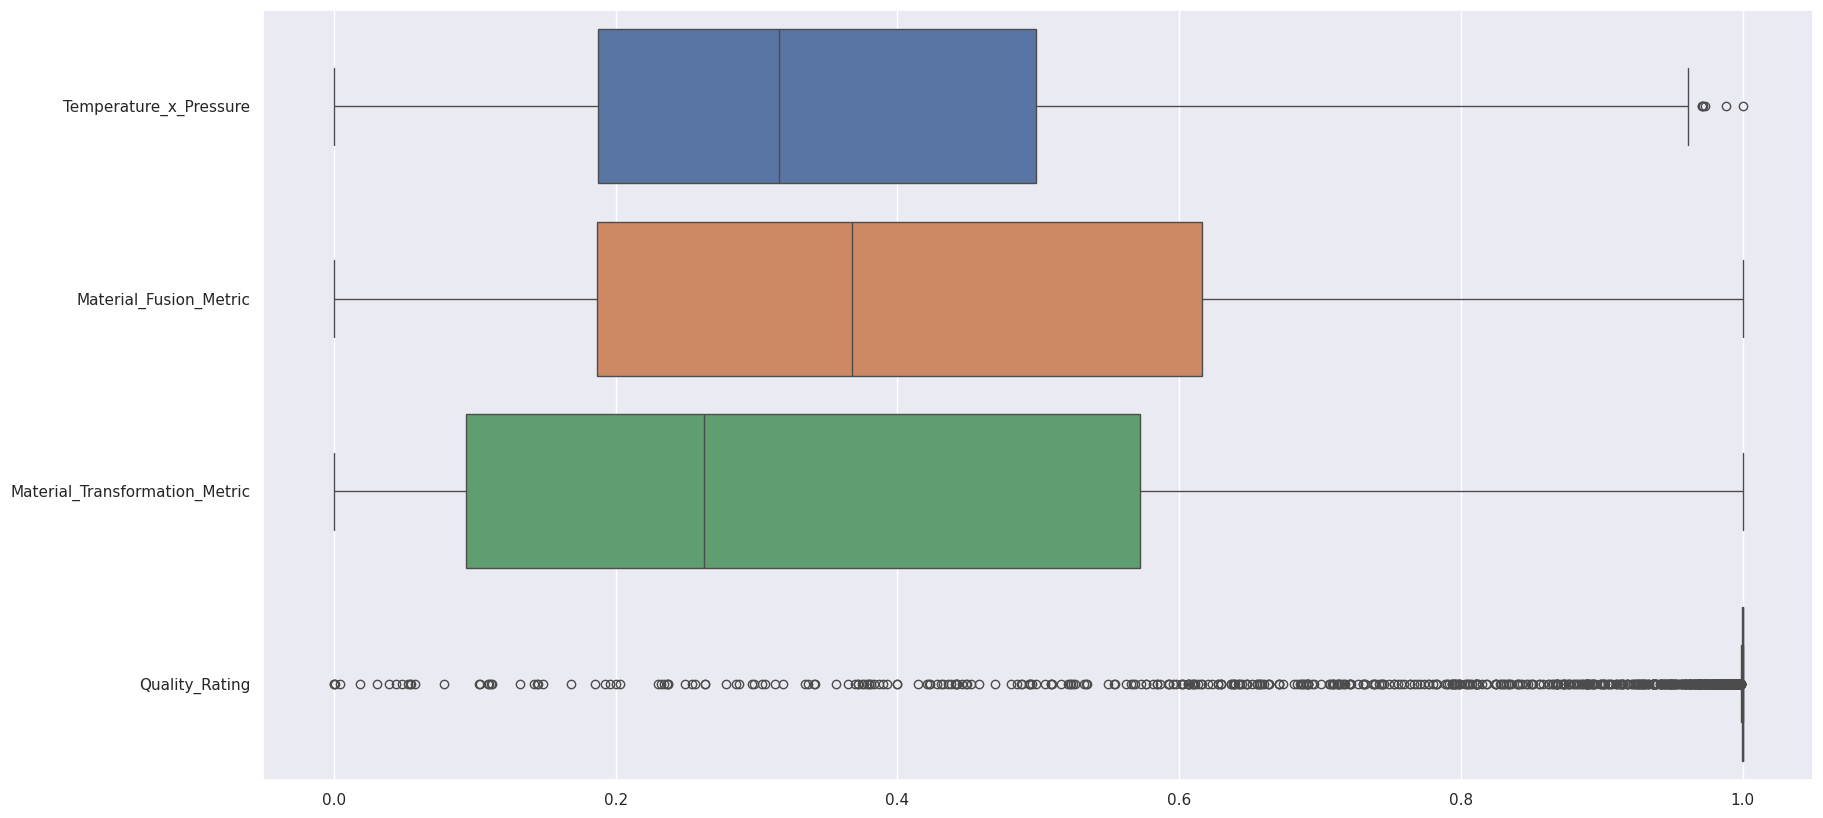

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
df = pd.DataFrame(scaled_data, columns = data.columns)

plt.figure(figsize=(20,10))
sns.set(font_scale=1)
sns.boxplot(data=df, orient='h')

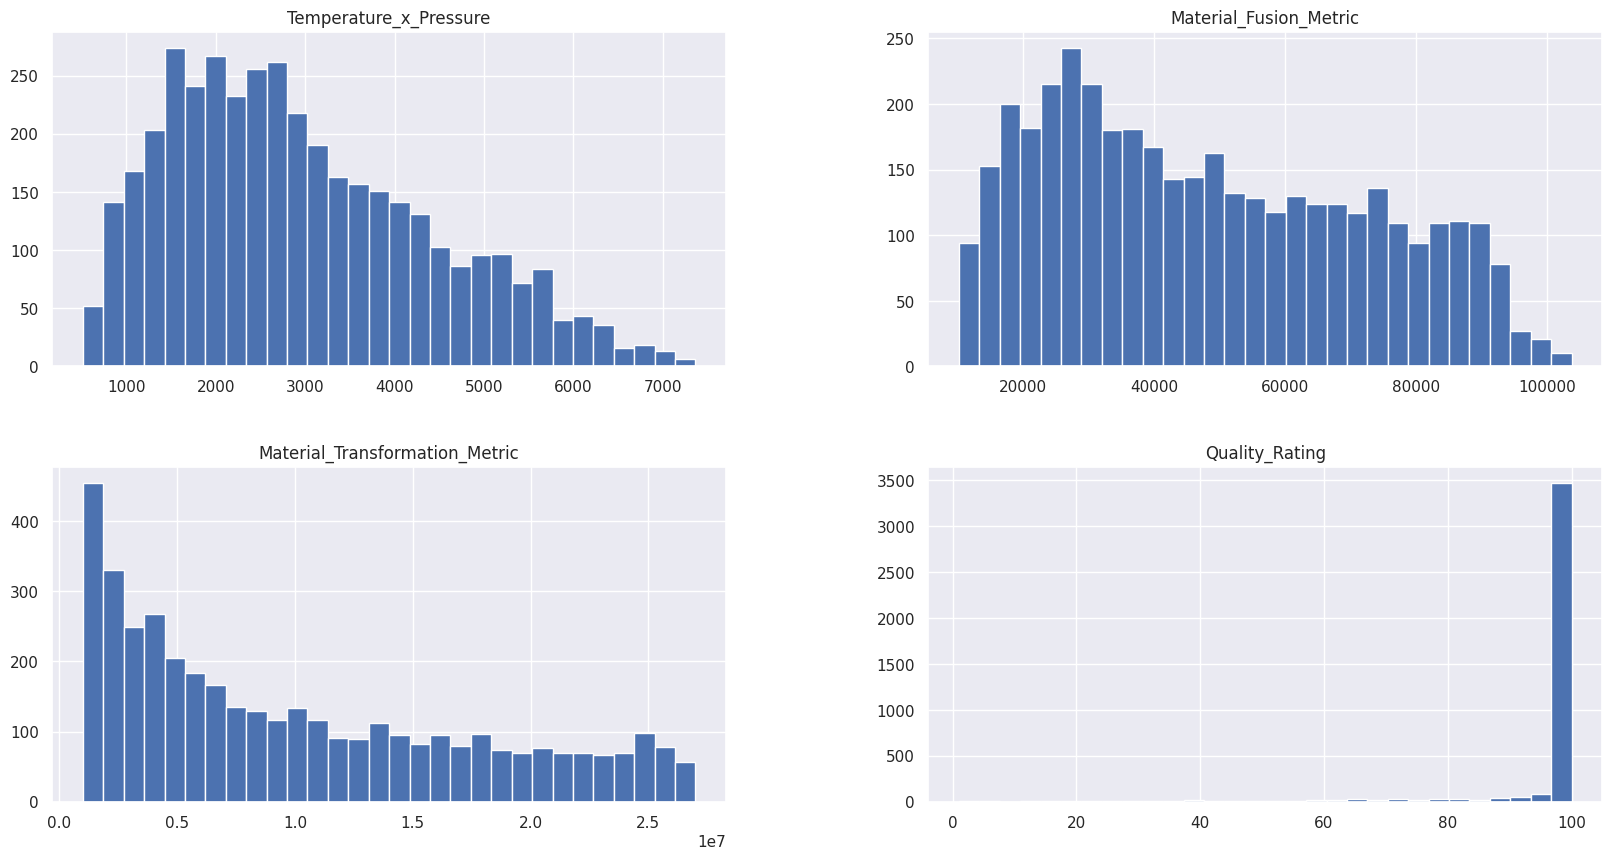

In [11]:
data.hist(bins = 30, figsize= (20, 10), layout=(2,2) )
plt.show()

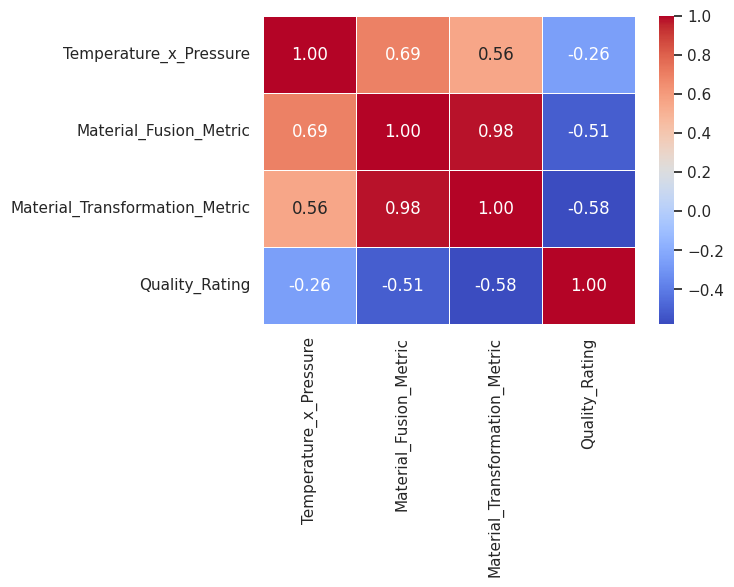

In [12]:
correlations = data.corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
lin_x = data.drop('Quality_Rating', axis=1)
lin_y = data['Quality_Rating']

x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(lin_x,lin_y,test_size=0.3,random_state=42)

In [15]:
lin_model = LinearRegression()
lin_model.fit(x_train_lin,y_train_lin)

LinearRegression()

In [16]:
lin_train_r2 = lin_model.score(x_train_lin,y_train_lin)
lin_test_r2 = lin_model.score(x_test_lin,y_test_lin)
print(f"\nThe R^2 score of the LinearRegression model on training data is : {lin_train_r2}")
print(f"\nThe R^2 score of the LinearRegression model on testing data is : {lin_test_r2}")


The R^2 score of the LinearRegression model on training data is : 0.43607737311690453

The R^2 score of the LinearRegression model on testing data is : 0.45701824313677175


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
data.head()

,Temperature_x_Pressure,Material_Fusion_Metric,Material_Transformation_Metric,Quality_Rating
0,1688.769167,44522.217074,9.229576e+06,99.999971
1,3842.931469,63020.764997,1.435537e+07,99.985703
2,1729.823314,49125.950249,1.072839e+07,99.999758
3,4970.736918,57128.881547,9.125702e+06,99.999975
4,2918.345014,38068.201283,6.303792e+06,100.000000


In [19]:
x = data.drop('Quality_Rating', axis=1)
y = data['Quality_Rating']

In [20]:
x.head()

,Temperature_x_Pressure,Material_Fusion_Metric,Material_Transformation_Metric
0,1688.769167,44522.217074,9.229576e+06
1,3842.931469,63020.764997,1.435537e+07
2,1729.823314,49125.950249,1.072839e+07
3,4970.736918,57128.881547,9.125702e+06
4,2918.345014,38068.201283,6.303792e+06


In [21]:
y.head()

0     99.999971
1     99.985703
2     99.999758
3     99.999975
4    100.000000
Name: Quality_Rating, dtype: float64

In [22]:
from sklearn.pipeline import Pipeline

PolynomialRegression = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=3)),
    ('linear_regression', LinearRegression())
])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
PolynomialRegression.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=3)),
                ('linear_regression', LinearRegression())])

In [25]:
train_r2 = PolynomialRegression.score(x_train,y_train)
test_r2 = PolynomialRegression.score(x_test,y_test)
print(f"\nThe R^2 score of the PolynomialRegression model on training data is : {train_r2}")
print(f"\nThe R^2 score of the PolynomialRegression model on testing data is : {test_r2}")


The R^2 score of the PolynomialRegression model on training data is : 0.9576859219188705

The R^2 score of the PolynomialRegression model on testing data is : 0.9564143429271659


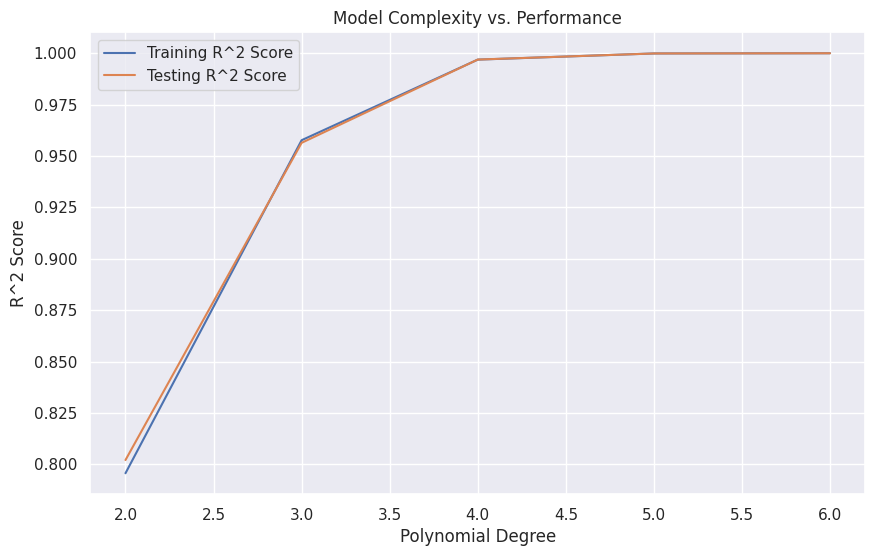

In [26]:
from sklearn.pipeline import make_pipeline

degrees = [2, 3, 4, 5, 6]
train_r2_scores = []
test_r2_scores = []

for degree in degrees:
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train, y_train)
    train_r2_scores.append(model.score(x_train, y_train))
    test_r2_scores.append(model.score(x_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(degrees, train_r2_scores, label='Training R^2 Score')
plt.plot(degrees, test_r2_scores, label='Testing R^2 Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 Score')
plt.title('Model Complexity vs. Performance')
plt.legend()
plt.show()

In [27]:
poly_pred_train = PolynomialRegression.predict(x_train)
poly_pred_test = PolynomialRegression.predict(x_test)

In [28]:
print('Mean Absolute Error for Training data:',mean_absolute_error(y_train, poly_pred_train))
print('Mean Squared Error for Training data:',mean_squared_error(y_train, poly_pred_train))
print('Root Mean Squared Error for Training data:',np.sqrt(mean_squared_error(y_train, poly_pred_train)))
print()
print('Mean Absolute Error for Testing data:',mean_absolute_error(y_test, poly_pred_test))
print('Mean Squared Error for Testing data:',mean_squared_error(y_test, poly_pred_test))
print('Root Mean Squared Error for Testing data:',np.sqrt(mean_squared_error(y_test, poly_pred_test)))

Mean Absolute Error for Training data: 1.7354764356560566
Mean Squared Error for Training data: 6.56500284720692
Root Mean Squared Error for Training data: 2.562226150675799

Mean Absolute Error for Testing data: 1.836176081192763
Mean Squared Error for Testing data: 8.731524901396577
Root Mean Squared Error for Testing data: 2.9549153797353616


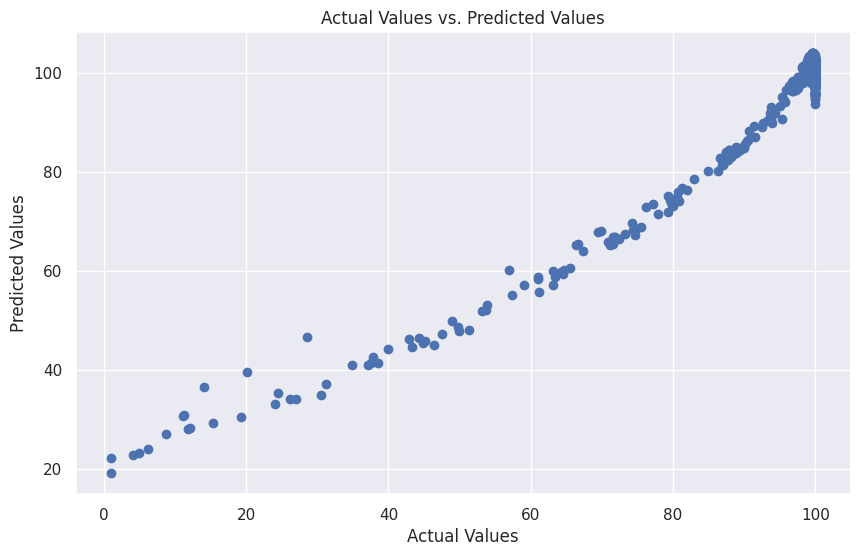

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, poly_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs. Predicted Values')
plt.show()

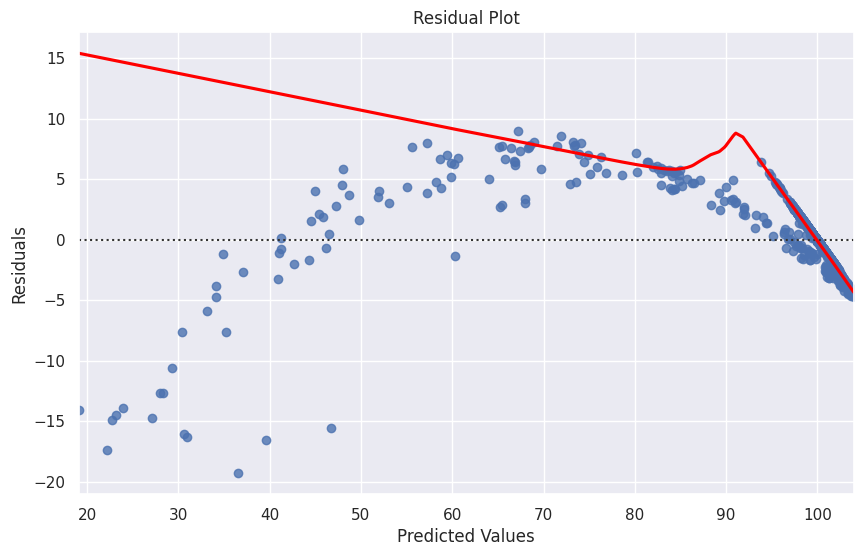

In [30]:
residuals = y_test - poly_pred_test

plt.figure(figsize=(10,6))
sns.residplot(x=poly_pred_test, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

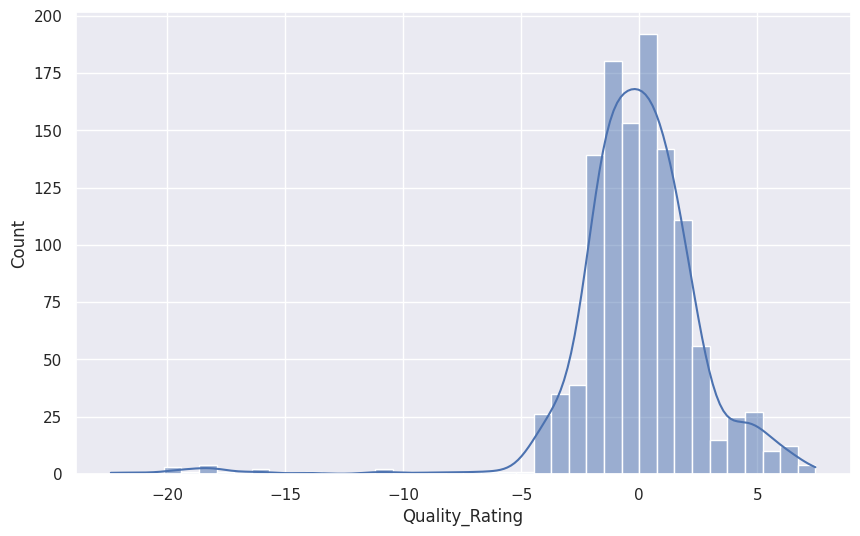

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=40, kde=True)
plt.show()

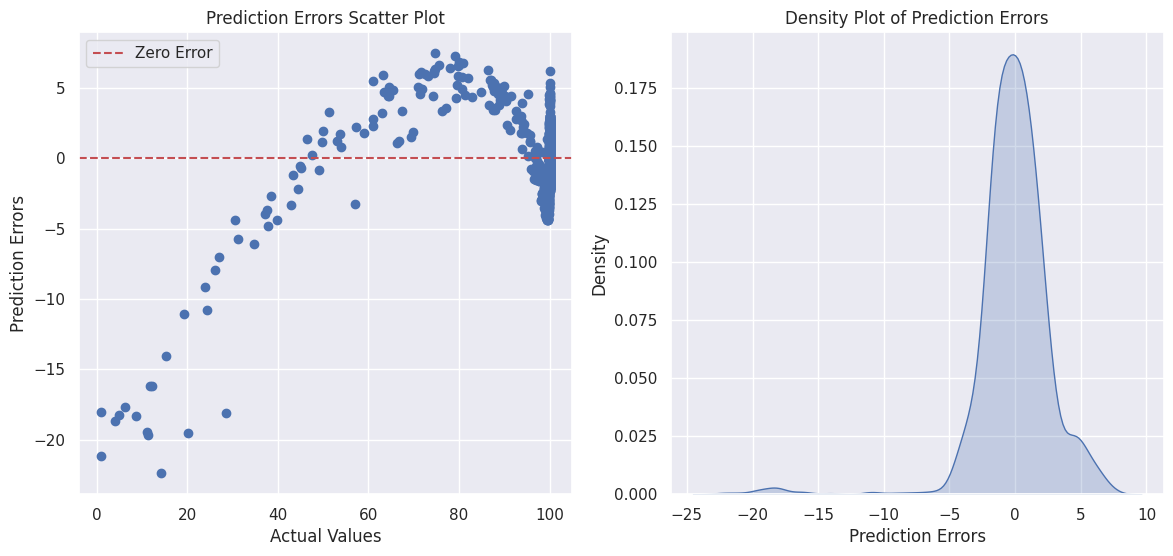

In [32]:
errors = y_test - PolynomialRegression.predict(x_test)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, errors)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error')
plt.xlabel('Actual Values')
plt.ylabel('Prediction Errors')
plt.title('Prediction Errors Scatter Plot')
plt.legend()

plt.subplot(1,2,2)
sns.kdeplot(errors, fill=True)
plt.xlabel('Prediction Errors')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')

plt.show()